In [3]:
import pandas as pd
from env import host, username, password
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:

def get_zillow_data():
    """
    This function connects to the zillow database and retrieves data from the properties_2017 table for
    all 'Single Family Residential' properties. The resulting DataFrame contains the 60 columns of information.
    """
   
    # create the connection url
    url = f'mysql+pymysql://{username}:{password}@{host}/zillow'

    # read the SQL query into a DataFrame
    query = '''
SELECT p.*, predictions_2017.transactiondate, predictions_2017.logerror
FROM properties_2017 AS p
INNER JOIN (
    SELECT parcelid, MAX(transactiondate) AS transactiondate
    FROM predictions_2017
    GROUP BY parcelid
) AS t
ON p.parcelid = t.parcelid
AND p.latitude IS NOT NULL
AND p.longitude IS NOT NULL
AND p.propertylandusetypeid IN (
    SELECT propertylandusetypeid
    FROM propertylandusetype
    WHERE propertylandusetypeid IN (260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 273, 274, 275, 276, 279)
    
)
LEFT JOIN airconditioningtype 
ON p.airconditioningtypeid = airconditioningtype.airconditioningtypeid
LEFT JOIN architecturalstyletype 
ON p.architecturalstyletypeid = architecturalstyletype.architecturalstyletypeid
LEFT JOIN buildingclasstype 
ON p.buildingclasstypeid = buildingclasstype.buildingclasstypeid
LEFT JOIN heatingorsystemtype 
ON p.heatingorsystemtypeid = heatingorsystemtype.heatingorsystemtypeid
LEFT JOIN propertylandusetype 
ON p.propertylandusetypeid = propertylandusetype.propertylandusetypeid
LEFT JOIN storytype 
ON p.storytypeid = storytype.storytypeid
LEFT JOIN typeconstructiontype 
ON p.typeconstructiontypeid = typeconstructiontype.typeconstructiontypeid
INNER JOIN predictions_2017 
ON p.parcelid = predictions_2017.parcelid
AND predictions_2017.transactiondate = predictions_2017.transactiondate
'''
    df = pd.read_sql(query, url)

    return df

In [5]:
# Call the function to get the Zillow data
zillow_df = get_zillow_data()

# Write dataframe to CSV file
zillow_df.to_csv("zillow_data.csv", index=False)

In [6]:
# function to read from csv file
def read_csv_file():
    df = pd.read_csv('zillow_data.csv')
    return df

In [7]:
get_zillow_data = read_csv_file()

In [8]:
get_zillow_data.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transactiondate,logerror
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,2017-01-01,0.025595
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,2017-01-01,0.055619
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,2017-01-01,0.005383
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,2017-01-01,-0.103410
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,2017-01-01,0.006940


In [9]:
df = get_zillow_data

In [10]:
df.describe()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,7.427600e+04,7.427600e+04,24792.000000,207.000000,50.000000,74276.000000,74276.000000,0.0,47054.000000,73996.000000,...,17385.000000,172.0,7.417000e+04,7.427500e+04,74276.0,7.427400e+04,74271.000000,2662.000000,7.403500e+04,74276.000000
mean,1.495411e+06,1.303896e+07,1.807277,7.386473,679.720000,2.277182,3.004335,NaN,6.637332,2.285313,...,1.428933,1.0,1.903859e+05,4.912523e+05,2016.0,3.011396e+05,5998.339938,14.108565,6.050076e+13,0.016839
std,8.609656e+05,3.541930e+06,2.962713,2.728030,689.703546,0.956815,1.032352,NaN,1.689862,0.948783,...,0.544312,0.0,2.336204e+05,6.601642e+05,0.0,4.963452e+05,7706.601471,2.209578,1.566783e+12,0.168000
min,3.490000e+02,1.071186e+07,1.000000,2.000000,38.000000,0.000000,0.000000,NaN,1.000000,1.000000,...,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,4.000000,6.037101e+13,-4.655420
25%,7.530092e+05,1.152020e+07,1.000000,7.000000,273.000000,2.000000,2.000000,NaN,6.000000,2.000000,...,1.000000,1.0,8.438925e+04,2.065780e+05,2016.0,8.468075e+04,2704.710000,14.000000,6.037401e+13,-0.023506
50%,1.499236e+06,1.256514e+07,1.000000,7.000000,515.000000,2.000000,3.000000,NaN,7.000000,2.000000,...,1.000000,1.0,1.365865e+05,3.588800e+05,2016.0,2.032030e+05,4434.840000,15.000000,6.037621e+13,0.006717
75%,2.240480e+06,1.424157e+07,1.000000,7.000000,796.500000,3.000000,4.000000,NaN,8.000000,3.000000,...,2.000000,1.0,2.190245e+05,5.681850e+05,2016.0,3.663768e+05,6903.350000,15.000000,6.059042e+13,0.038531
max,2.982274e+06,1.676893e+08,13.000000,21.000000,3560.000000,18.000000,14.000000,NaN,12.000000,18.000000,...,6.000000,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999


In [11]:
# Print the shape of the DataFrame
print("Shape of DataFrame: ", df.shape)

# Print summary statistics of the DataFrame
print("Summary Statistics:\n", df.describe())

# Print information about the DataFrame
print("DataFrame Information:\n")
df.info()

# Print the data types of each column in the DataFrame
print("Data Types:\n", df.dtypes)

# Print the value counts of each column in the DataFrame
print("Value Counts:\n", df.apply(pd.Series.value_counts))

# Print the distribution of each column in the DataFrame
print("Distribution:\n", df.apply(pd.Series.describe))

Shape of DataFrame:  (74276, 61)
Summary Statistics:
                  id      parcelid  airconditioningtypeid  \
count  7.427600e+04  7.427600e+04           24792.000000   
mean   1.495411e+06  1.303896e+07               1.807277   
std    8.609656e+05  3.541930e+06               2.962713   
min    3.490000e+02  1.071186e+07               1.000000   
25%    7.530092e+05  1.152020e+07               1.000000   
50%    1.499236e+06  1.256514e+07               1.000000   
75%    2.240480e+06  1.424157e+07               1.000000   
max    2.982274e+06  1.676893e+08              13.000000   

       architecturalstyletypeid  basementsqft   bathroomcnt    bedroomcnt  \
count                207.000000     50.000000  74276.000000  74276.000000   
mean                   7.386473    679.720000      2.277182      3.004335   
std                    2.728030    689.703546      0.956815      1.032352   
min                    2.000000     38.000000      0.000000      0.000000   
25%                 

In [12]:
def missing_values_summary(df):
    # Calculate the number of missing values in each column
    missing_values = df.isna().sum()

    # Calculate the percentage of missing values in each column
    pct_missing_values = 100 * missing_values / len(df)

    # Create a new DataFrame to hold the results
    summary_df = pd.DataFrame({'num_rows_missing': missing_values, 'pct_rows_missing': pct_missing_values})
    summary_df.index.name = 'attribute_name'

    # Sort the DataFrame by the number of missing values in descending order
    summary_df = summary_df.sort_values(by='num_rows_missing', ascending=False)

    # Return the summary DataFrame
    return summary_df

In [13]:
missing = missing_values_summary(df)

In [14]:
missing.head(50)

,num_rows_missing,pct_rows_missing
attribute_name,,
buildingclasstypeid,74276,100.000000
finishedsquarefeet15,74265,99.985190
finishedsquarefeet13,74234,99.943454
basementsqft,74226,99.932684
storytypeid,74226,99.932684
yardbuildingsqft26,74206,99.905757
finishedsquarefeet6,74109,99.775163
fireplaceflag,74104,99.768431
architecturalstyletypeid,74069,99.721310


In [15]:
# Filter based on propertylandusetypeid to exclude non-single unit properties
single_unit_ids = [261, 262, 263, 264, 266, 279]
df = df[df['propertylandusetypeid'].isin(single_unit_ids)]

# Remove properties with more than one unit
df = df[(df['unitcnt'].isnull()) | (df['unitcnt'] == 1)]

# Drop rows with missing values in key columns
df = df.dropna(subset=['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet'])

# Reset index after filtering
df.reset_index(drop=True, inplace=True)

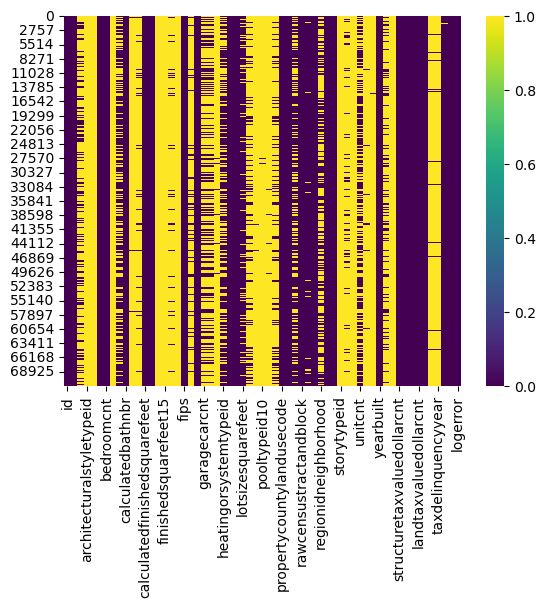

In [16]:
# create a heatmap of missing values using seaborn
sns.heatmap(df.isnull(), cmap='viridis')

# show the plot
plt.show()

In [17]:
df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transactiondate,logerror
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,2017-01-01,0.025595
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,2017-01-01,0.055619
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,2017-01-01,0.005383
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,2017-01-01,-0.103410
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,2017-01-01,0.006940


In [18]:
def handle_missing_values(df, prop_required_column, prop_required_row):
    # Drop columns based on the proportion of missing values
    column_threshold = int(df.shape[0] * prop_required_column)
    df = df.dropna(axis=1, thresh=column_threshold)

    # Drop rows based on the proportion of missing values
    row_threshold = int(df.shape[1] * prop_required_row)
    df = df.dropna(axis=0, thresh=row_threshold)

    return df

# Example usage:
# Assuming the data is in a DataFrame named 'data'
# prop_required_column = 0.6
# prop_required_row = 0.75
# cleaned_data = handle_missing_values(data, prop_required_column, prop_required_row)


In [19]:
prep_df = handle_missing_values(df, .60, .75)

In [20]:
prep_df.head()

,id,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,transactiondate,logerror
0,1727539,14297519,3.5,4.0,NaN,3.5,3100.0,3100.0,6059.0,3.0,...,NaN,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,2017-01-01,0.025595
1,1387261,17052889,1.0,2.0,NaN,1.0,1465.0,1465.0,6111.0,1.0,...,NaN,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,2017-01-01,0.055619
2,11677,14186244,2.0,3.0,NaN,2.0,1243.0,1243.0,6059.0,2.0,...,NaN,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,2017-01-01,0.005383
3,2288172,12177905,3.0,4.0,8.0,3.0,2376.0,2376.0,6037.0,3.0,...,1.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,2017-01-01,-0.103410
4,1970746,10887214,3.0,3.0,8.0,3.0,1312.0,1312.0,6037.0,3.0,...,1.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,6.037124e+13,2017-01-01,0.006940


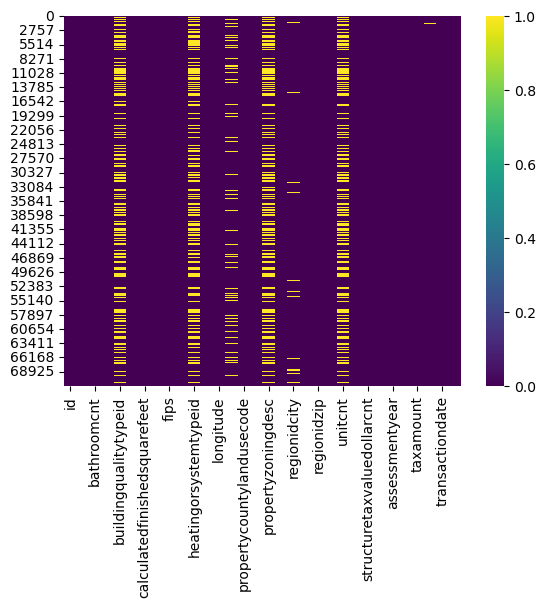

In [21]:
# create a heatmap of missing values using seaborn
sns.heatmap(prep_df.isnull(), cmap='viridis')

# show the plot
plt.show()

In [22]:
prep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71670 entries, 0 to 71669
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            71670 non-null  int64  
 1   parcelid                      71670 non-null  int64  
 2   bathroomcnt                   71670 non-null  float64
 3   bedroomcnt                    71670 non-null  float64
 4   buildingqualitytypeid         45034 non-null  float64
 5   calculatedbathnbr             71595 non-null  float64
 6   calculatedfinishedsquarefeet  71670 non-null  float64
 7   finishedsquarefeet12          71492 non-null  float64
 8   fips                          71670 non-null  float64
 9   fullbathcnt                   71595 non-null  float64
 10  heatingorsystemtypeid         46660 non-null  float64
 11  latitude                      71670 non-null  float64
 12  longitude                     71670 non-null  float64
 13  l

### MALL CUSTOMERS 

In [23]:
def get_mall_data():
    # create the connection url
    url = f'mysql+pymysql://{username}:{password}@{host}/mall_customers'

    query = '''
    SELECT * 
    From customers'''

    df = pd.read_sql(query, url)

    return df

In [24]:
# Call the function to get the Zillow data
mall_df = get_mall_data()

# Write dataframe to CSV file
mall_df.to_csv("mall_data.csv", index=False)

In [25]:
def read_csv_file():
    df = pd.read_csv('mall_data.csv')
    return df

In [26]:
mall_df = read_csv_file()

In [27]:
mall_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
# Print the shape of the DataFrame
print("Shape of DataFrame: ", mall_df.shape)

# Print summary statistics of the DataFrame
print("Summary Statistics:\n", mall_df.describe())

# Print information about the DataFrame
print("DataFrame Information:\n")
mall_df.info()

# Print the data types of each column in the DataFrame
print("Data Types:\n", mall_df.dtypes)

# Print the value counts of each column in the DataFrame
print("Value Counts:\n", mall_df.apply(pd.Series.value_counts))

# Print the distribution of each column in the DataFrame
print("Distribution:\n", mall_df.apply(pd.Series.describe))

Shape of DataFrame:  (200, 5)
Summary Statistics:
        customer_id         age  annual_income  spending_score
count   200.000000  200.000000     200.000000      200.000000
mean    100.500000   38.850000      60.560000       50.200000
std      57.879185   13.969007      26.264721       25.823522
min       1.000000   18.000000      15.000000        1.000000
25%      50.750000   28.750000      41.500000       34.750000
50%     100.500000   36.000000      61.500000       50.000000
75%     150.250000   49.000000      78.000000       73.000000
max     200.000000   70.000000     137.000000       99.000000
DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 

In [29]:
# Detect outliers using IQR
Q1 = mall_df.quantile(0.25)
Q3 = mall_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((mall_df < (Q1 - 1.5 * IQR)) | (mall_df > (Q3 + 1.5 * IQR))).any(axis=1)
df_outliers = mall_df[outliers]

In [30]:
outliers.shape

(200,)

In [31]:
df_outliers.shape

(2, 5)

In [32]:
# 5. Split data into train, validate, and test
train_df, test_df = train_test_split(mall_df, test_size=0.2, random_state=42)
train_df, validate_df = train_test_split(train_df, test_size=0.25, random_state=42)

In [33]:
# 6. Encode categorical columns using pd.get_dummies
train_df_encoded = pd.get_dummies(train_df, columns=['gender','age','annual_income','spending_score'])
validate_df_encoded = pd.get_dummies(validate_df, columns=['gender','age','annual_income','spending_score'])
test_df_encoded = pd.get_dummies(test_df, columns=['gender','age','annual_income','spending_score'])

In [34]:
# 7. Handle missing values
train_df_encoded.fillna(train_df_encoded.median(), inplace=True)
validate_df_encoded.fillna(validate_df_encoded.median(), inplace=True)
test_df_encoded.fillna(test_df_encoded.median(), inplace=True)

In [35]:
print("\nTrain Data:")
print(train_df_encoded.head())

print("\nValidate Data:")
print(validate_df_encoded.head())

print("\nTest Data:")
print(test_df_encoded.head())

print("\nOutliers:")
print(df_outliers.head())


Train Data:
     customer_id  gender_Female  gender_Male  age_18  age_19  age_20  age_21  \
42            43              0            1       0       0       0       0   
157          158              1            0       0       0       0       0   
155          156              1            0       0       0       0       0   
3              4              1            0       0       0       0       0   
99           100              0            1       0       0       1       0   

     age_22  age_23  age_24  ...  spending_score_88  spending_score_89  \
42        0       0       0  ...                  0                  0   
157       0       0       0  ...                  0                  0   
155       0       0       0  ...                  0                  1   
3         0       1       0  ...                  0                  0   
99        0       0       0  ...                  0                  0   

     spending_score_90  spending_score_91  spending_score_92 